In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [3]:
df= pd.read_csv("heart.csv")

In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
df.shape

(303, 14)

In [6]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [7]:
# uniquenss
for column in df.columns:
    distinct_value=len(df[column].unique())
    print(f"{column}:{distinct_value} distinct values")

age:41 distinct values
sex:2 distinct values
cp:4 distinct values
trtbps:49 distinct values
chol:152 distinct values
fbs:2 distinct values
restecg:3 distinct values
thalachh:91 distinct values
exng:2 distinct values
oldpeak:40 distinct values
slp:3 distinct values
caa:5 distinct values
thall:4 distinct values
output:2 distinct values


In [8]:
duplicate_data = df[df.duplicated()]
print("No. of Duplicate Rows: ", duplicate_data)

No. of Duplicate Rows:       age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [9]:
df=df.drop_duplicates()

## Univariate Analysis

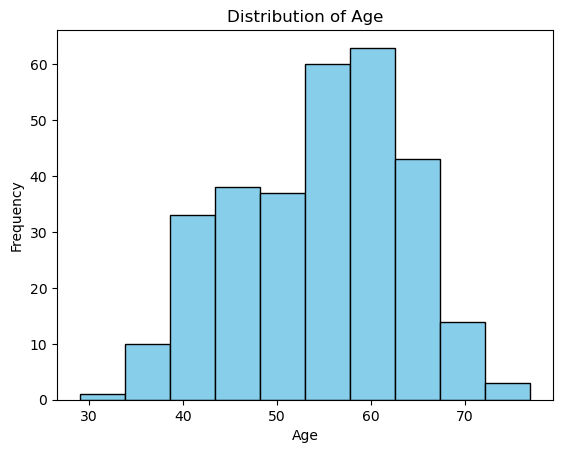

In [10]:
plt.hist(df['age'],bins=10,color='skyblue',edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

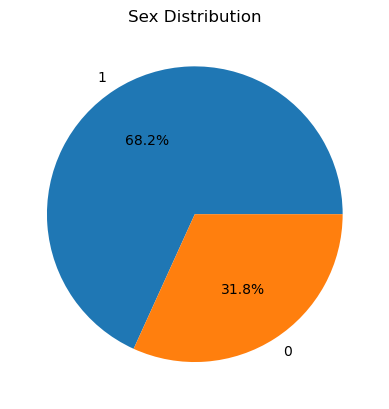

In [11]:
sex_count=df['sex'].value_counts()
plt.pie(sex_count,labels=sex_count.index,autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

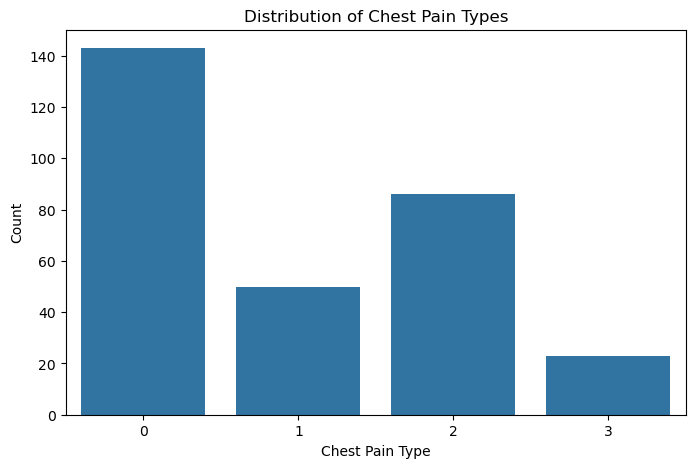

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='cp',data=df)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

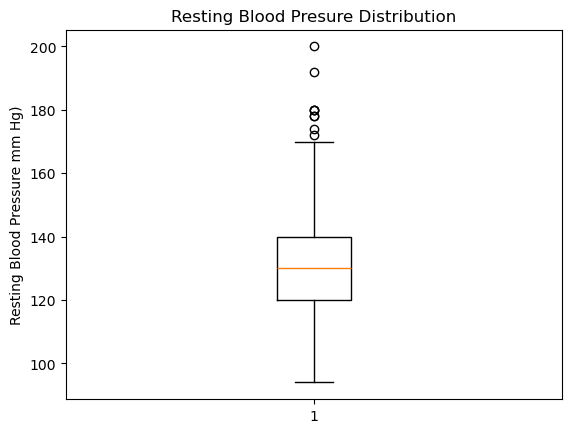

In [13]:
plt.boxplot(df['trtbps'])
plt.title('Resting Blood Presure Distribution')
plt.ylabel('Resting Blood Pressure mm Hg)')
plt.show()

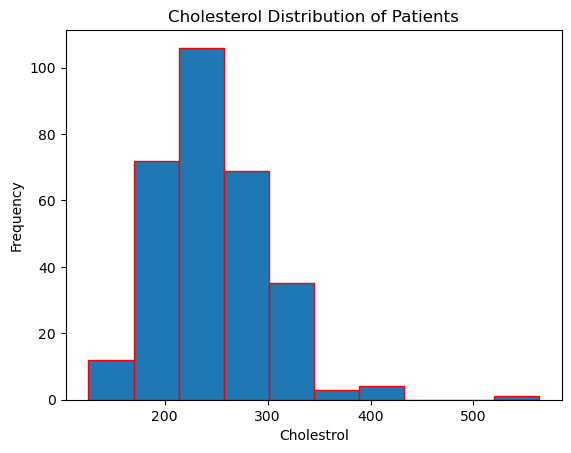

In [14]:
plt.hist(df['chol'],bins=10,edgecolor='red')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()

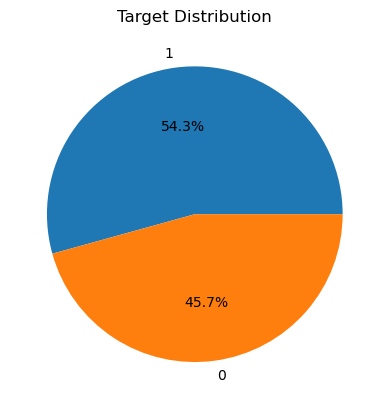

In [15]:
target_count=df['output'].value_counts()
plt.pie(target_count,labels=target_count.index,autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

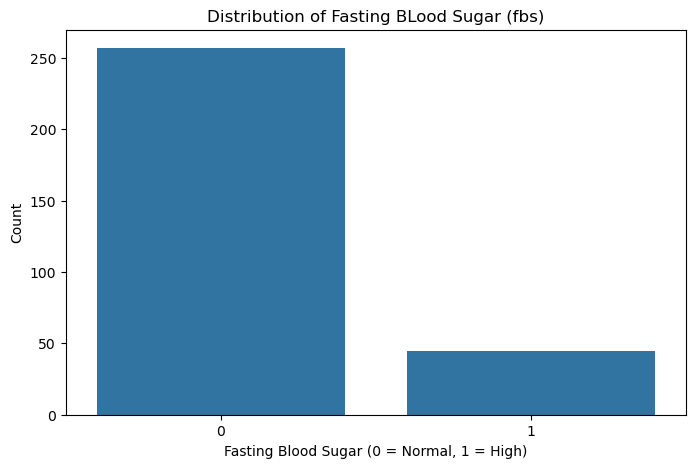

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='fbs',data=df)
plt.title('Distribution of Fasting BLood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar (0 = Normal, 1 = High)')
plt.ylabel('Count')
plt.show()

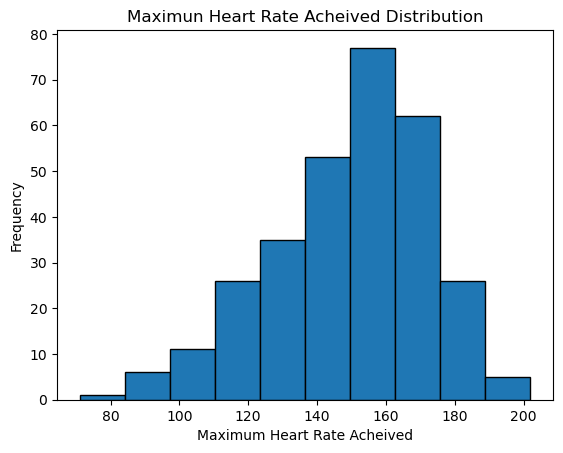

In [17]:
plt.hist(df['thalachh'],bins=10,edgecolor='black')
plt.title('Maximun Heart Rate Acheived Distribution')
plt.xlabel('Maximum Heart Rate Acheived')
plt.ylabel('Frequency')
plt.show()

## Bivarate Analysis

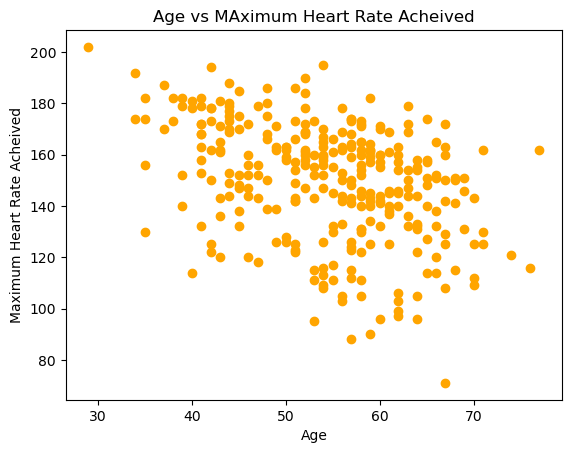

In [18]:
plt.scatter(df['age'],df['thalachh'],color='orange')
plt.title('Age vs MAximum Heart Rate Acheived')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Acheived')
plt.show()

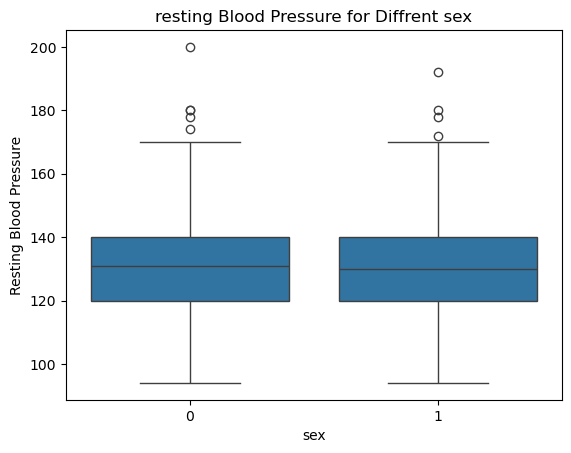

In [19]:
sns.boxplot(x='sex',y='trtbps',data=df)
plt.title('resting Blood Pressure for Diffrent sex')
plt.xlabel('sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/1834317538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='chol',data=df,palette='deep')


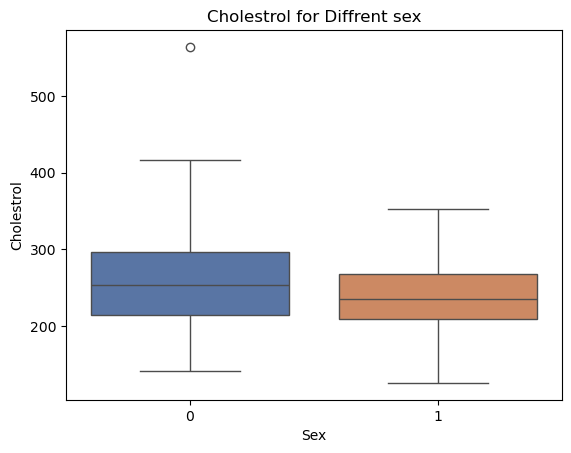

In [20]:
sns.boxplot(x='sex', y='chol',data=df,palette='deep')
plt.title('Cholestrol for Diffrent sex')
plt.xlabel('Sex')
plt.ylabel('Cholestrol')
plt.show()

/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/2479875080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='thalachh',data=df,palette='husl')


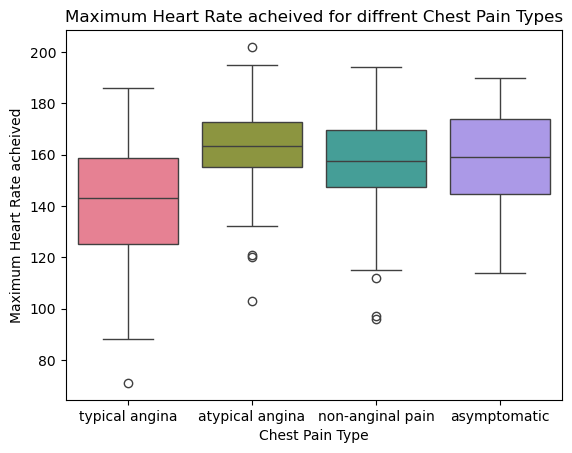

In [21]:
sns.boxplot(x='cp', y='thalachh',data=df,palette='husl')
plt.title('Maximum Heart Rate acheived for diffrent Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate acheived')
plt.xticks(ticks=[0,1,2,3],labels=['typical angina',
                                   'atypical angina','non-anginal pain','asymptomatic'])
plt.show()

/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/2720668359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='chol',data=df,palette='deep')


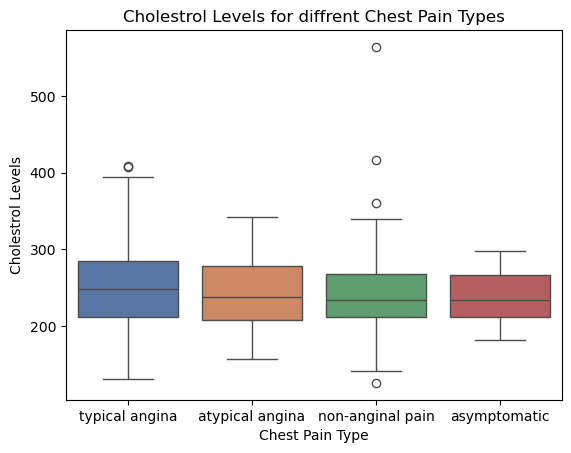

In [22]:
sns.boxplot(x='cp', y='chol',data=df,palette='deep')
plt.title('Cholestrol Levels for diffrent Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholestrol Levels')
plt.xticks(ticks=[0,1,2,3],labels=['typical angina',
                                   'atypical angina','non-anginal pain','asymptomatic'])
plt.show()

/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/2606617279.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fbs', y='chol',data=df,palette='dark')


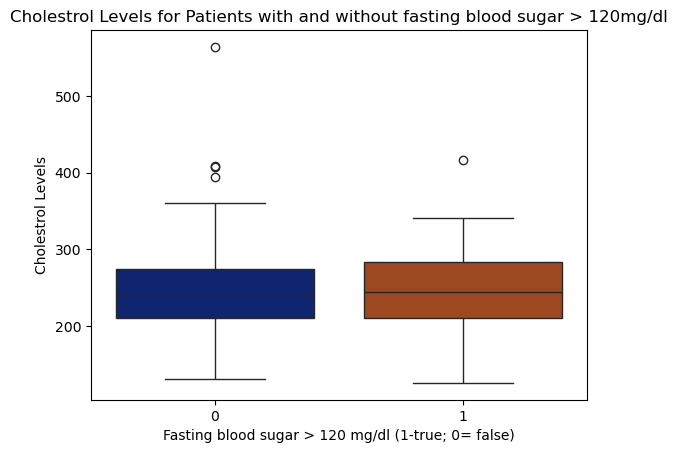

In [23]:
sns.boxplot(x='fbs', y='chol',data=df,palette='dark')
plt.title('Cholestrol Levels for Patients with and without fasting blood sugar > 120mg/dl')
plt.xlabel('Fasting blood sugar > 120 mg/dl (1-true; 0= false)')
plt.ylabel('Cholestrol Levels')
plt.show()

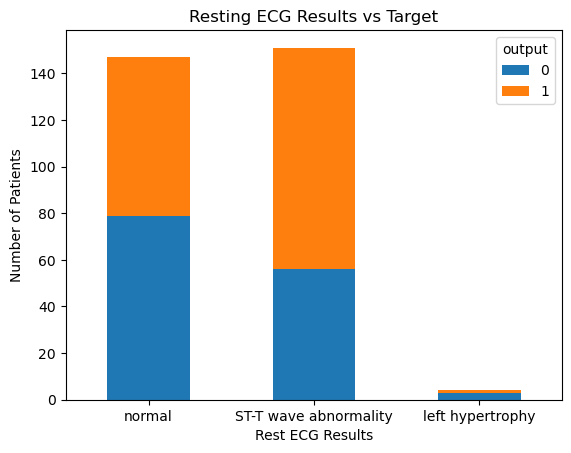

In [24]:
restecg_target=df.groupby(['restecg','output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar',stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2],labels=['normal','ST-T wave abnormality','left hypertrophy'],
           rotation=0)
plt.show()

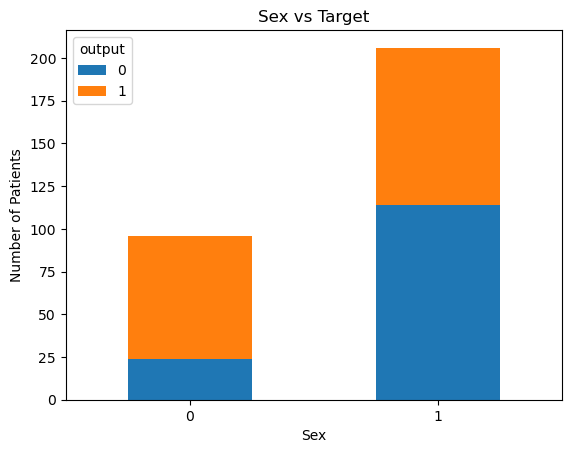

In [25]:
sex_target=df.groupby(['sex','output']).size().unstack().fillna(0)
sex_target.plot(kind='bar',stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

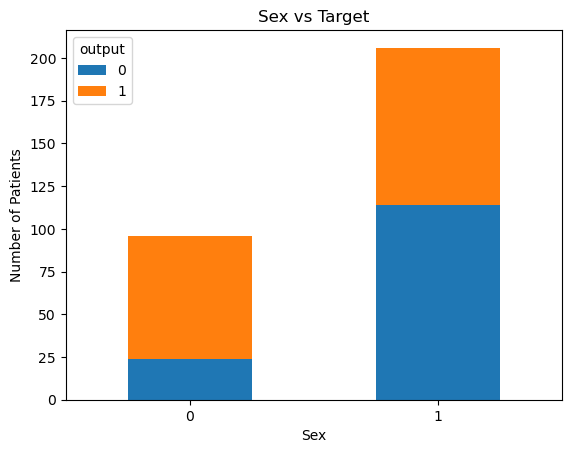

In [26]:
sex_target=df.groupby(['sex','output']).size().unstack().fillna(0)
sex_target.plot(kind='bar',stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/2667466549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='trtbps',data=df,palette='husl')


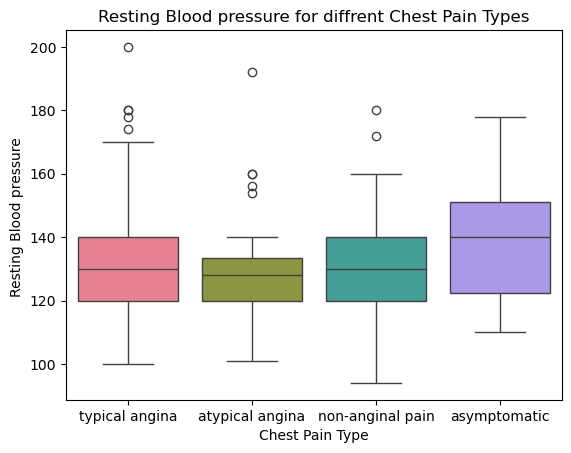

In [27]:
sns.boxplot(x='cp', y='trtbps',data=df,palette='husl')
plt.title('Resting Blood pressure for diffrent Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood pressure ')
plt.xticks(ticks=[0,1,2,3],labels=['typical angina',
                                   'atypical angina','non-anginal pain','asymptomatic'])
plt.show()

## Multivariate Analysis:

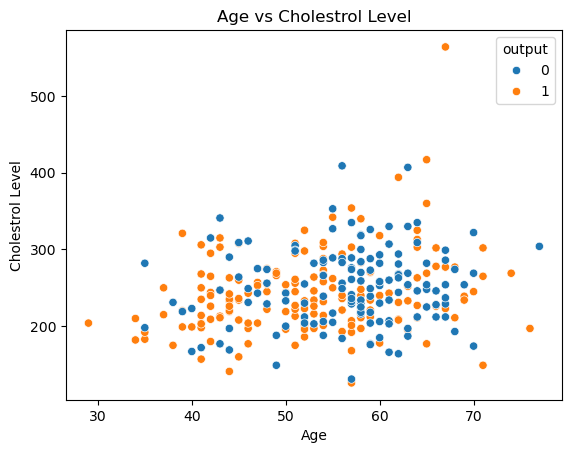

In [28]:
sns.scatterplot(x='age',y='chol',hue='output',data=df)
plt.title('Age vs Cholestrol Level')
plt.xlabel('Age')
plt.ylabel('Cholestrol Level')
plt.show()

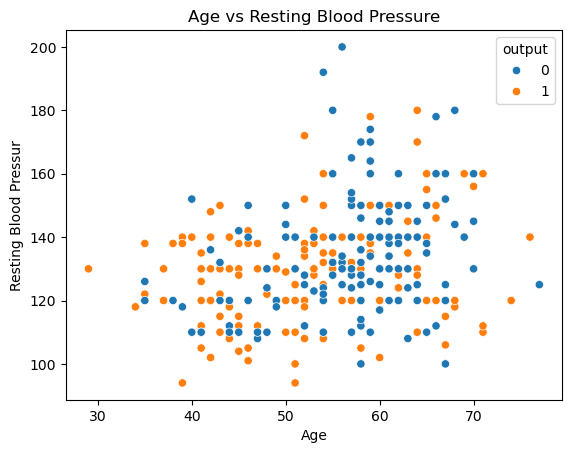

In [29]:
sns.scatterplot(x='age',y='trtbps',hue='output',data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressur')
plt.show()

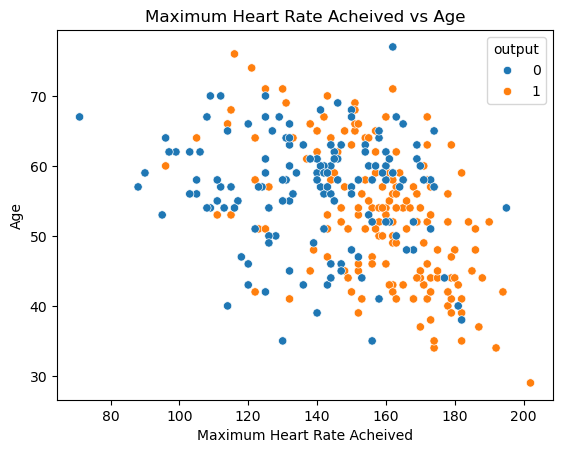

In [30]:
sns.scatterplot(x='thalachh',y='age',hue='output',data=df)
plt.title('Maximum Heart Rate Acheived vs Age')
plt.xlabel('Maximum Heart Rate Acheived')
plt.ylabel('Age')
plt.show()

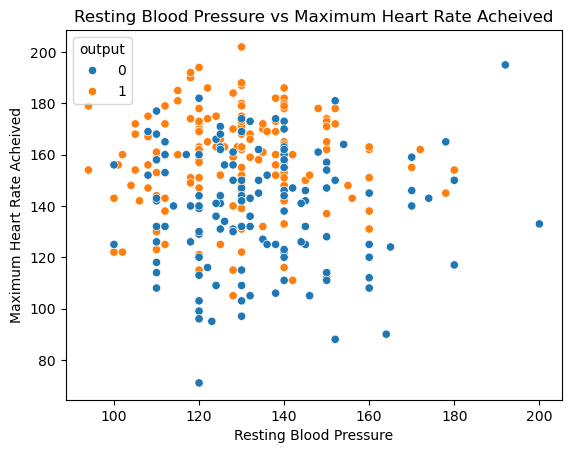

In [31]:
sns.scatterplot(x ='trtbps',y='thalachh', hue='output',data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Acheived')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Acheived')
plt.show()

In [32]:
categorical_columns=['sex','cp','restecg','slp','thall']
numerical_columns=['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa','output']
dummy=pd.get_dummies(df,columns=categorical_columns,drop_first=False)

## Preprocessing and scaling data

In [33]:
scaler=StandardScaler()
scaled_numerical=scaler.fit_transform(df[numerical_columns])
scaled_numerical_df=pd.DataFrame(scaled_numerical,columns=numerical_columns)

In [34]:
dummy=dummy.drop(numerical_columns, axis=1)
                                     

In [35]:
processed_df=pd.concat([dummy,scaled_numerical_df],axis=1)

## Correlation  matrix with dummy variables

In [36]:
correlation_matrix=processed_df.corr()

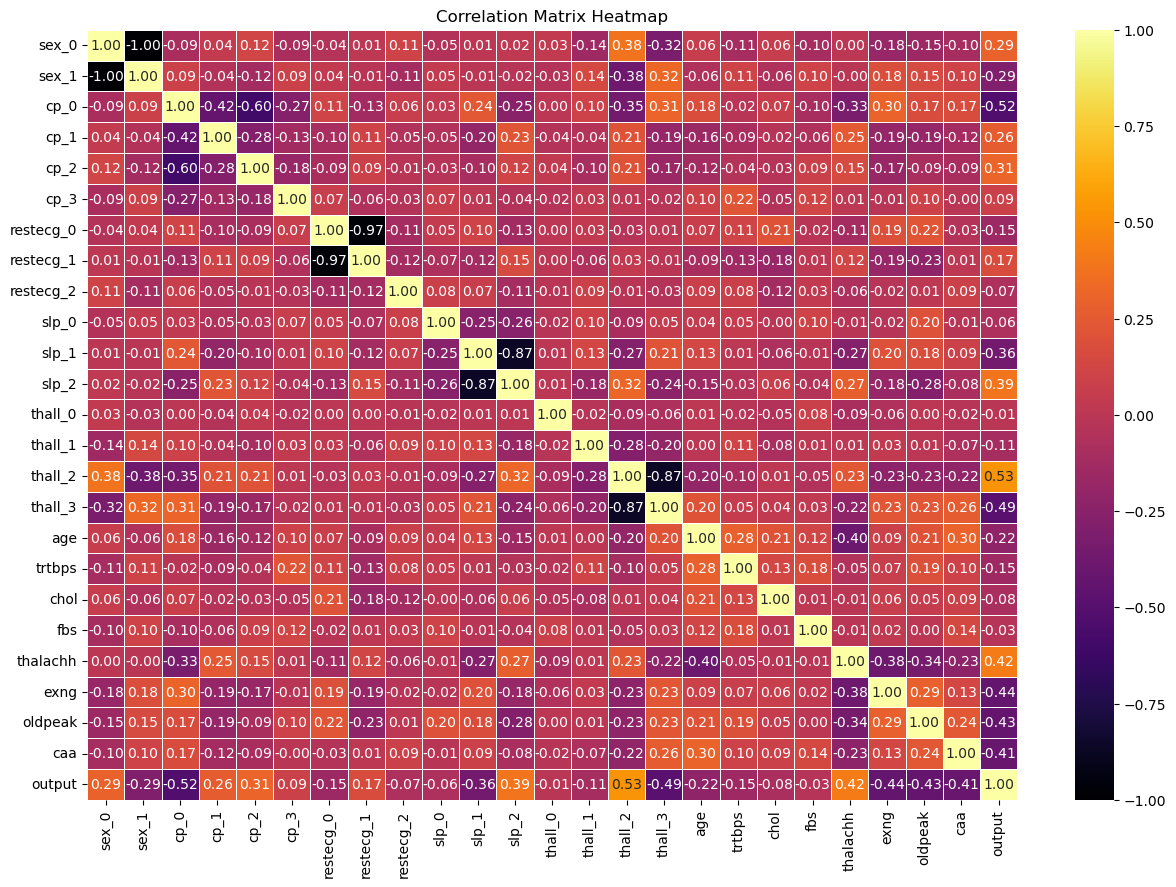

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='inferno',linewidths=0.5,fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [38]:
corr=processed_df.corr()
target_corr=corr['output'].drop('output')
target_corr_sorted=target_corr.sort_values(ascending=False)

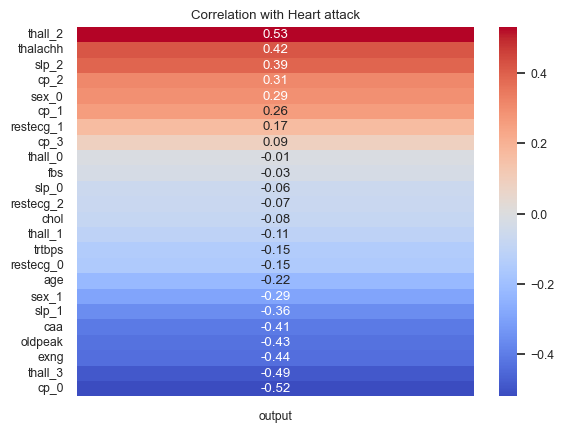

In [39]:
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("dark")
sns.heatmap(target_corr_sorted.to_frame(),cmap="coolwarm",annot=True,fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

### Cluster Analysis Preprocessing

In [40]:
le=LabelEncoder()

In [41]:
for col in ['sex','cp','restecg','slp','thall']:
    df[col]=le.fit_transform(df[col])
scaler=StandardScaler()
for col in ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']:
    df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))

/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/1698322310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/1698322310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
/var/folders/60/xyq28fzs7kq3rgszm8tzrvdm0000gn/T/ipykernel_9380/1698322310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [42]:
from sklearn.decomposition import PCA
X=df.drop('output',axis=1).values
y=df['output'].values

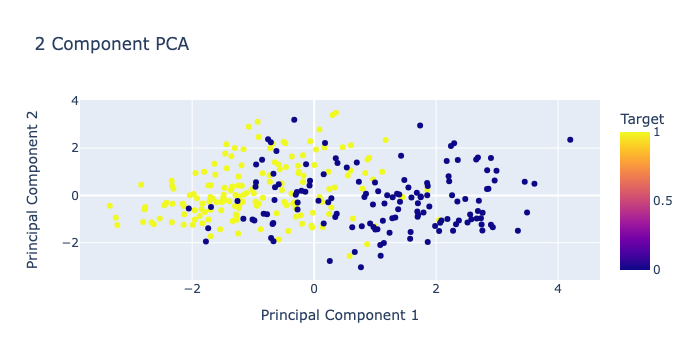

In [43]:
pca=PCA(n_components=2,random_state=42)
X_pca=pca.fit_transform(X)

df_pca=pd.DataFrame(data=X_pca,columns=['Principal Component 1',
                                        'Principal Component 2'])

df_pca['Target']=y

fig_pca=px.scatter(df_pca, x='Principal Component 1', y='Principal Component 2',
                   color='Target',
                                   title='2 Component PCA',template='plotly')
fig_pca.show()

### Data Preprocessing

In [44]:
categorical_columns=['sex','cp','restecg','slp','thall']
numerical_columns=['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [45]:
X= df.drop('output',axis=1)
y=df['output']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),numerical_columns),
                                            ('cat',OneHotEncoder(),categorical_columns)])



In [48]:
X_train_df = pd.DataFrame(X_train,columns=categorical_columns)  
X_test_df = pd.DataFrame(X_test,columns=numerical_columns) 

In [49]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)



In [50]:
print(X_train.shape) 
print(X_test.shape) 

(241, 24)
(61, 24)


In [51]:
def evaluate_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_acc=accuracy_score(y_train,train_pred)
    test_acc=accuracy_score(y_test,test_pred)
    return train_acc,test_acc,test_pred

In [52]:
import itertools

In [53]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    thresh=cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if 
                 cm[i,j]>thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
from sklearn.ensemble import GradientBoostingClassifier


### Model Training

In [55]:
models=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier(),
        GaussianNB()]

In [56]:
model_names=["Logistic Regression","SVC","Decidion Trees",
             "Random Forest","Gradient Boosting","KNN","Naive Bayes"]

train_results=[]
test_results=[]

## Model Evaluation:


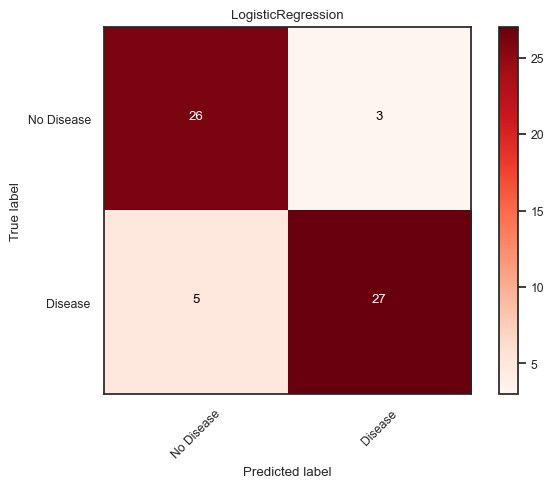

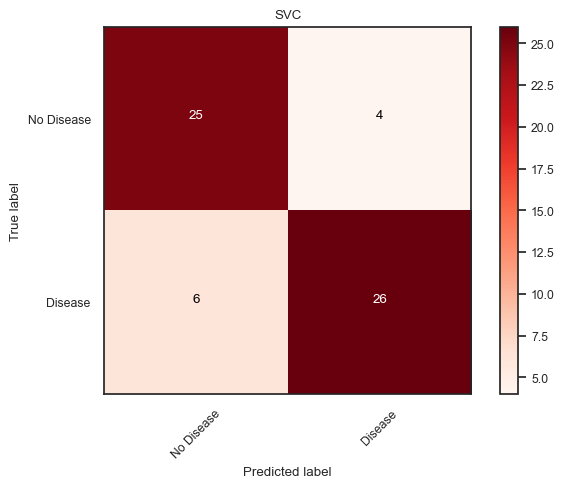

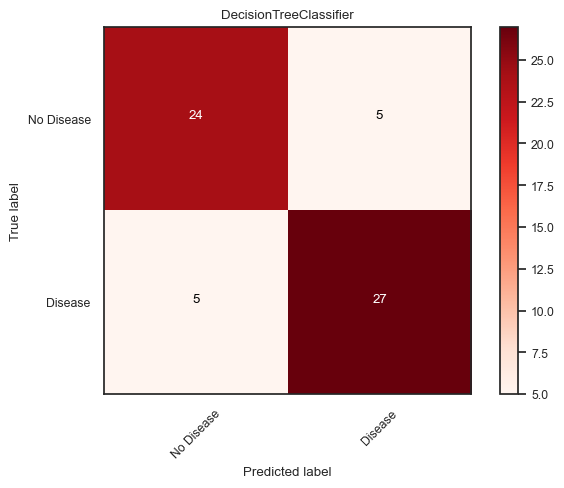

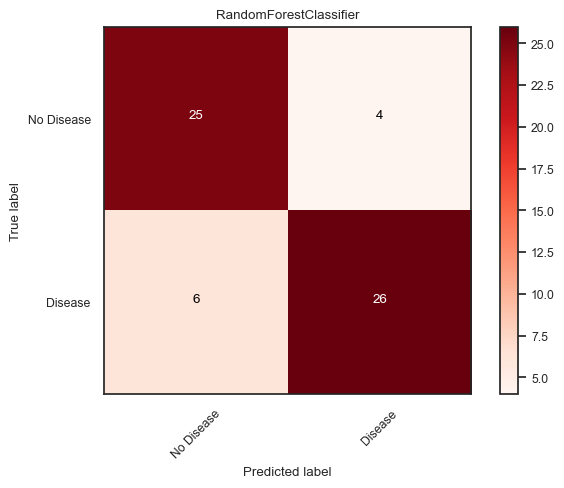

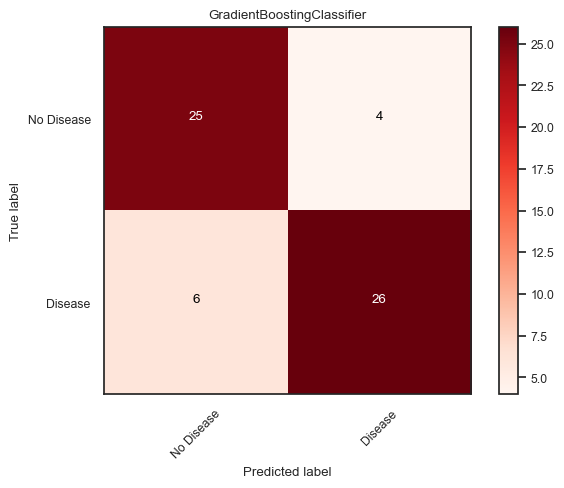

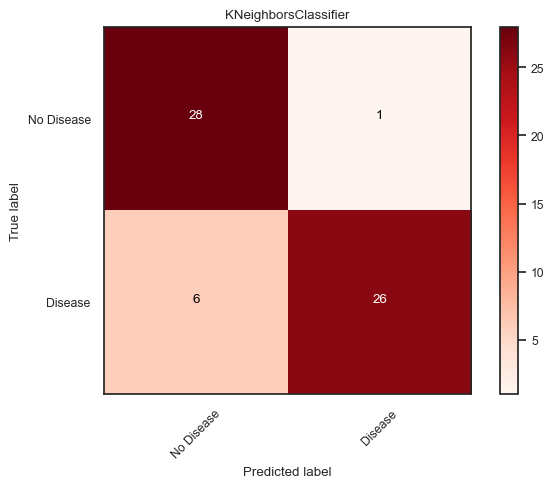

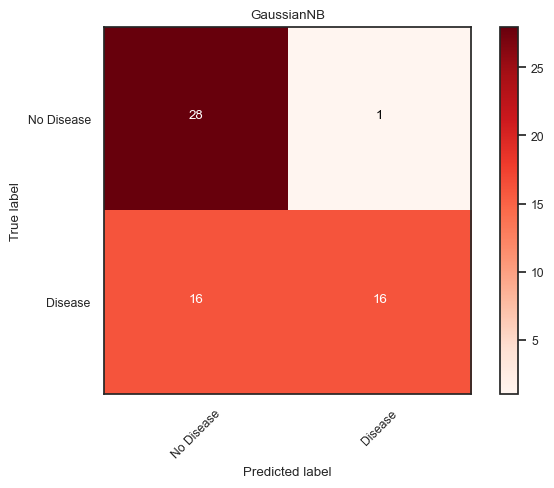

In [57]:
for model in models:
    train_acc,test_acc,y_pred= evaluate_model(model,X_train,y_train,X_test,y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm=confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(cm,classes=['No Disease','Disease'],title=model.__class__.__name__,cmap=plt.cm.Reds)
    plt.show()

In [58]:
model_names = model_names[:13]  # Assuming there are 13 models
train_results = train_results[:13]  # Ensure train_results and test_results have the same length
test_results = test_results[:13] 


In [59]:
model_names = model_names[:len(train_results)]  
# Ensure train_results and test_results have the same length
test_results = test_results[:len(train_results)]


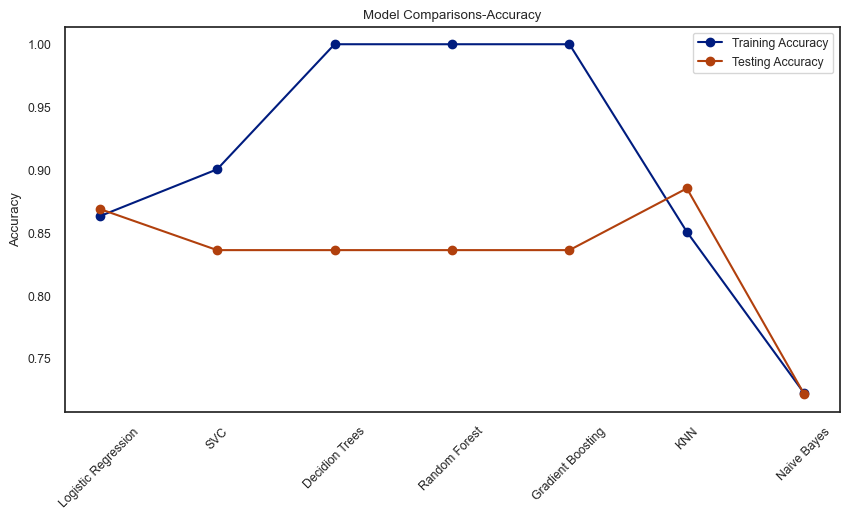

In [66]:
# Model Performance
plt.figure(figsize=(10,5))
plt.plot(model_names,train_results,'o-' ,label="Training Accuracy")
plt.plot(model_names,test_results, 'o-' ,label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons-Accuracy")
plt.show()

#### Summary of the graph:
#### The best performing  model on the testing data is Gradient Boosting, with accuracy of 0.87